# First Method

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Enter input filepath: /content/drive/MyDrive/Colab Notebooks/Komputer Vision/random_input_images/OIP (1).jpg
Enter image comparasion directory path: /content/drive/MyDrive/Colab Notebooks/Komputer Vision/images_character


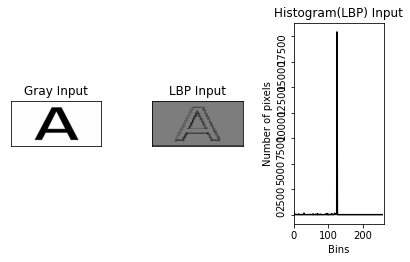

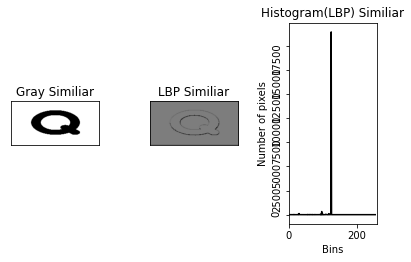

In [3]:
import numpy as np
import cv2
import glob
from matplotlib import pyplot as plt
from scipy.spatial import distance
from skimage.feature import local_binary_pattern
from google.colab.patches import cv2_imshow

def get_pixel(img, center, x, y):
  new_value = 0
  try:
    if img[x, y] >= center:
      new_value = 1
  except:
    pass
  return new_value

def lbp_calculated_pixel(img, x, y):
  '''
  63 | 128 |  1
  -------------
  32 |   0 |  2
  -------------
  16 |   8 |  4
  '''
  center = img[x, y]
  val_ar = []
  val_ar.append(get_pixel(img, center, x-1, y+1)) # top right
  val_ar.append(get_pixel(img, center, x, y+1)) # right
  val_ar.append(get_pixel(img, center, x+1, y+1)) # bottom right
  val_ar.append(get_pixel(img, center, x+1, y)) # bottom
  val_ar.append(get_pixel(img, center, x+1, y-1)) # bttom left
  val_ar.append(get_pixel(img, center, x-1, y-1)) # top left
  val_ar.append(get_pixel(img, center, x-1, y)) # top

  power_val = [1, 2, 4, 8, 16, 32, 62, 128]
  val = 0
  for i in range(len(val_ar)):
    val += val_ar[i] * power_val[i]
  return val

def calculated_input_image():
  query = input("Enter input filepath: ")
  image_input = cv2.imread(query)
  image_input = cv2.resize(image_input, (200, 100))
  height, width, channel = image_input.shape
  img_gray_input = cv2.cvtColor(image_input, cv2.COLOR_BGR2GRAY)
  img_lbp_input = np.zeros((height, width, 3), np.uint8)

  for i in range(0, height):
    for j in range(0, width):
      img_lbp_input[i, j] = lbp_calculated_pixel(img_gray_input, i, j)
  
  hist_lbp_input = cv2.calcHist([img_lbp_input], [0], None, [256], [0, 256])
  return hist_lbp_input, img_gray_input, img_lbp_input


def compare_image_distance(hist_lbp_input, closestDistance):
  query = input("Enter image comparasion directory path: ")
  
  # loop images folder
  for filename in glob.glob(query  + '/*.*'):
    image = cv2.imread(filename)
    image = cv2.resize(image, (200, 100))
    height, width, channel = image.shape
    img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    img_lbp = np.zeros((height, width, 3), np.uint8)

    for i in range(0, height):
      for j in range(0, width):
        img_lbp[i, j] = lbp_calculated_pixel(img_gray, i, j)
    
    hist_lbp = cv2.calcHist([img_lbp], [0], None, [256], [0, 256])
    # compare euclidean distance
    dist = distance.euclidean(hist_lbp_input, hist_lbp)
    # if closes then update
    if dist < closestDistance:
      closestDistance = dist
      img_gray_similiar = img_gray
      img_lbp_similiar = img_lbp
      hist_lbp_similiar = hist_lbp

  return img_gray_similiar, img_lbp_similiar, hist_lbp_similiar

def show_output(output_list):
  output_list_len = len(output_list)
  figure = plt.figure()

  for i in range(output_list_len):
    current_dict = output_list[i]
    current_img = current_dict["img"]
    current_xlabel = current_dict["xlabel"]
    current_ylabel = current_dict["ylabel"]
    current_xtick = current_dict["xtick"]
    current_ytick = current_dict["ytick"]
    current_title = current_dict["title"]
    current_type = current_dict["type"]
    current_plot = figure.add_subplot(1, output_list_len, i+1)

    if current_type == "gray":
      current_plot.imshow(current_img, cmap = plt.get_cmap('gray'))
      current_plot.set_title(current_title)
      current_plot.set_xticks(current_xtick)
      current_plot.set_yticks(current_ytick)
      current_plot.set_xlabel(current_xlabel)
      current_plot.set_ylabel(current_ylabel)
    elif current_type == "histogram":
      current_plot.plot(current_img, color = "black")
      current_plot.set_xlim([0, 260])
      current_plot.set_title(current_title)
      current_plot.set_xlabel(current_xlabel)
      current_plot.set_ylabel(current_ylabel)
      ytick_list = [int(i) for i in current_plot.get_yticks()]
      current_plot.set_yticklabels(ytick_list, rotation = 90)
  figure.tight_layout(pad=2.0)
  plt.show()


def main():
  # threshold
  closestDistance = 99999999
  hist_lbp_input, img_gray_input, img_lbp_input = calculated_input_image()
  img_gray_similiar, img_lbp_similiar, hist_lbp_similiar = compare_image_distance(hist_lbp_input, closestDistance)
  
  # output image
  output_list_1 = []
  output_list_2 = []

  output_list_1.append({
      "img": img_gray_input,
      "xlabel": "",
      "ylabel": "",
      "xtick": [],
      "ytick": [],
      "title": "Gray Input",
      "type": "gray",
  })

  output_list_1.append({
      "img": img_lbp_input,
      "xlabel": "",
      "ylabel": "",
      "xtick": [],
      "ytick": [],
      "title": "LBP Input",
      "type": "gray",
  })

  output_list_1.append({
      "img": hist_lbp_input,
      "xlabel": "Bins",
      "ylabel": "Number of pixels",
      "xtick": None,
      "ytick": None,
      "title": "Histogram(LBP) Input",
      "type": "histogram",
  })

  output_list_2.append({
      "img": img_gray_similiar,
      "xlabel": "",
      "ylabel": "",
      "xtick": [],
      "ytick": [],
      "title": "Gray Similiar",
      "type": "gray",
  })

  output_list_2.append({
      "img": img_lbp_similiar,
      "xlabel": "",
      "ylabel": "",
      "xtick": [],
      "ytick": [],
      "title": "LBP Similiar",
      "type": "gray",
  })

  output_list_2.append({
      "img": hist_lbp_similiar,
      "xlabel": "Bins",
      "ylabel": "Number of pixels",
      "xtick": None,
      "ytick": None,
      "title": "Histogram(LBP) Similiar",
      "type": "histogram",
  })

  show_output(output_list_1)
  print("\n")
  show_output(output_list_2)

if __name__ == "__main__":
  main()

# Method 2

Enter input filepath: /content/drive/MyDrive/Colab Notebooks/Komputer Vision/random_input_images/OIP.jpg
Enter image comparasion directory path: /content/drive/MyDrive/Colab Notebooks/Komputer Vision/images_character


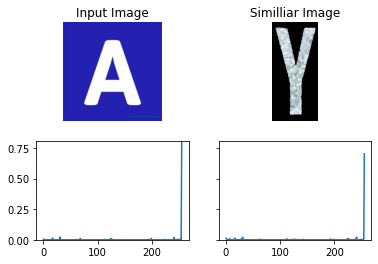

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from skimage import color
from skimage.feature import local_binary_pattern
from scipy.spatial.distance import euclidean

def lbp_histogram(path):
  img = cv2.imread(path)
  img = cv2.resize(img, (200, 100))
  img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  patterns = local_binary_pattern(img_gray, 8, 1)
  hist, _ = np.histogram(patterns, bins=np.arange(2**8 + 1), density=True)
  return hist


def compare_image_distance(hist_lbp_input, threshold):
  query = input("Enter image comparasion directory path: ")
  mostSimilarImage = ""
  match_hist = None
  # loop images folder
  for filename in glob.glob(query  + '/*.*'):
    hist = lbp_histogram(filename)
    dist = distance.euclidean(hist_lbp_input, hist)
    if dist < threshold:
      threshold = dist
      mostSimilarImage = filename
      match_hist = hist

  return mostSimilarImage, match_hist

def calculated_input_image():
  query = input("Enter input filepath: ")
  input_img_hist = lbp_histogram(query)
  return input_img_hist, query 

def main():
  # threshold
  threshold = 99999999

  input_img_hist, query = calculated_input_image()
  mostSimilarImage, match_hist = compare_image_distance(input_img_hist, threshold)

  input_img = cv2.imread(query)
  similiar_img = cv2.imread(mostSimilarImage)


  hmax = max([input_img_hist.max(), match_hist.max()])
  fig, ax = plt.subplots(2, 2)
  ax[0, 0].imshow(input_img)
  ax[0, 0].axis('off')
  ax[0, 0].set_title('Input Image')
  ax[1, 0].plot(input_img_hist)
  ax[1, 0].set_ylim([0, hmax])

  ax[0, 1].imshow(similiar_img)
  ax[0, 1].axis('off')
  ax[0, 1].set_title('Similliar Image')
  ax[1, 1].plot(match_hist)
  ax[1, 1].set_ylim([0, hmax])
  ax[1, 1].axes.yaxis.set_ticklabels([])

if __name__ == "__main__":
  main()

# Method 3

Enter input filepath: /content/drive/MyDrive/Colab Notebooks/Komputer Vision/random_input_images/OIP.jpg
Enter image comparasion directory path: /content/drive/MyDrive/Colab Notebooks/Komputer Vision/images_character
0.05691194953610355


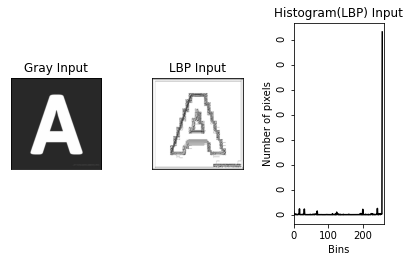

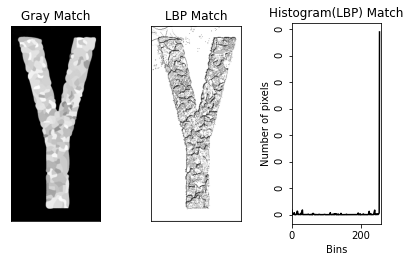

In [5]:
import numpy as np
from skimage import color
from skimage.feature import local_binary_pattern
from scipy.spatial.distance import euclidean
import matplotlib.pyplot as plt
import cv2


def get_pixel(img, center, x, y):
    new_value = 0
    try:
        if img[x][y] >= center:
            new_value = 1
    except:
        pass
    return new_value


def lbp_calculated_pixel(img, x, y):
    '''
     64 | 128 |   1
    ----------------
     32 |   0 |   2
    ----------------
     16 |   8 |   4    
    '''    
    center = img[x][y]
    val_ar = []
    val_ar.append(get_pixel(img, center, x-1, y+1))     # top_right
    val_ar.append(get_pixel(img, center, x, y+1))       # right
    val_ar.append(get_pixel(img, center, x+1, y+1))     # bottom_right
    val_ar.append(get_pixel(img, center, x+1, y))       # bottom
    val_ar.append(get_pixel(img, center, x+1, y-1))     # bottom_left
    val_ar.append(get_pixel(img, center, x, y-1))       # left
    val_ar.append(get_pixel(img, center, x-1, y-1))     # top_left
    val_ar.append(get_pixel(img, center, x-1, y))       # top
    
    power_val = [1, 2, 4, 8, 16, 32, 64, 128]
    val = 0
    for i in range(len(val_ar)):
        val += val_ar[i] * power_val[i]
    return val  


def lbp_histogram(path):
  img = cv2.imread(path)
  img = cv2.resize(img, (200, 100))
  # img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  img_gray = color.rgb2gray(img)
  patterns = local_binary_pattern(img_gray, 8, 1)
  hist, _ = np.histogram(patterns, bins=np.arange(2**8 + 1), density=True)
  return hist


def compare_image_distance(hist_lbp_input, threshold):
  query = input("Enter image comparasion directory path: ")
  mostSimilarImage = ""
  match_hist = None
  # loop images folder
  for filename in glob.glob(query  + '/*.*'):
    hist = lbp_histogram(filename)
    dist = distance.euclidean(hist_lbp_input, hist)
    if dist < threshold:
      threshold = dist
      mostSimilarImage = filename
      match_hist = hist

  return mostSimilarImage, match_hist

def calculated_input_image():
  query = input("Enter input filepath: ")
  input_img_hist = lbp_histogram(query)
  return input_img_hist, query 

def show_output(output_list):
  output_list_len = len(output_list)
  figure = plt.figure()

  for i in range(output_list_len):
    current_dict = output_list[i]
    current_img = current_dict["img"]
    current_xlabel = current_dict["xlabel"]
    current_ylabel = current_dict["ylabel"]
    current_xtick = current_dict["xtick"]
    current_ytick = current_dict["ytick"]
    current_title = current_dict["title"]
    current_type = current_dict["type"]
    current_plot = figure.add_subplot(1, output_list_len, i+1)

    if current_type == "gray":
      current_plot.imshow(current_img, cmap = plt.get_cmap('gray'))
      current_plot.set_title(current_title)
      current_plot.set_xticks(current_xtick)
      current_plot.set_yticks(current_ytick)
      current_plot.set_xlabel(current_xlabel)
      current_plot.set_ylabel(current_ylabel)
    elif current_type == "histogram":
      current_plot.plot(current_img, color = "black")
      current_plot.set_xlim([0, 260])
      current_plot.set_title(current_title)
      current_plot.set_xlabel(current_xlabel)
      current_plot.set_ylabel(current_ylabel)
      ytick_list = [int(i) for i in current_plot.get_yticks()]
      current_plot.set_yticklabels(ytick_list, rotation = 90)
  figure.tight_layout(pad=2.0)
  plt.show()

def main():
  # threshold
  threshold = 99999999

  input_img_hist, query = calculated_input_image()
  mostSimilarImage, match_hist = compare_image_distance(input_img_hist, threshold)

  input_img = cv2.imread(query)
  input_img_gray = color.rgb2gray(input_img)
  height, width, channel = input_img.shape
  img_lbp = np.zeros((height, width, 3), np.uint8)
  for i in range(0, height):
    for j in range(0, width):
      img_lbp[i, j] = lbp_calculated_pixel(input_img_gray, i, j)

  similiar_img = cv2.imread(mostSimilarImage)
  similiar_img_gray = color.rgb2gray(similiar_img)
  height, width, channel = similiar_img.shape
  img_lbp_match = np.zeros((height, width, 3), np.uint8)
  for i in range(0, height):
    for j in range(0, width):
      img_lbp_match[i, j] = lbp_calculated_pixel(similiar_img_gray, i, j)

  # output image
  print(distance.euclidean(input_img_hist, match_hist))
  output_list_1 = []
  output_list_2 = []

  output_list_1.append({
      "img": input_img_gray,
      "xlabel": "",
      "ylabel": "",
      "xtick": [],
      "ytick": [],
      "title": "Gray Input",
      "type": "gray",
  })

  output_list_1.append({
      "img": img_lbp,
      "xlabel": "",
      "ylabel": "",
      "xtick": [],
      "ytick": [],
      "title": "LBP Input",
      "type": "gray",
  })

  output_list_1.append({
      "img": input_img_hist,
      "xlabel": "Bins",
      "ylabel": "Number of pixels",
      "xtick": None,
      "ytick": None,
      "title": "Histogram(LBP) Input",
      "type": "histogram",
  })

  output_list_2.append({
      "img": similiar_img_gray,
      "xlabel": "",
      "ylabel": "",
      "xtick": [],
      "ytick": [],
      "title": "Gray Match",
      "type": "gray",
  })

  output_list_2.append({
      "img": img_lbp_match,
      "xlabel": "",
      "ylabel": "",
      "xtick": [],
      "ytick": [],
      "title": "LBP Match",
      "type": "gray",
  })

  output_list_2.append({
      "img": match_hist,
      "xlabel": "Bins",
      "ylabel": "Number of pixels",
      "xtick": None,
      "ytick": None,
      "title": "Histogram(LBP) Match",
      "type": "histogram",
  })

  show_output(output_list_1)
  print("\n")
  show_output(output_list_2)

if __name__ == "__main__":
  main()